<a href="https://colab.research.google.com/github/youngmook/aihub/blob/main/tutorials/Data_preprocessing_tutorial_in_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 11 Nov 2023

# 👋 PyCaret Data Preprocessing Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [2]:
!pip install pycaret[full] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 6.6 MB/s 

In [3]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

# 🚀 Quick start - Data Preprocessing

PyCaret's time series forecasting module is now available. The module currently is suitable for univariate / multivariate time series forecasting tasks. The API of time series module is consistent with other modules of PyCaret.

It comes built-in with preprocessing capabilities and over 30 algorithms comprising of statistical / time-series methods as well as machine learning based models. In addition to the model training, this module has lot of other capabilities such as automated hyperparameter tuning, ensembling, model analysis, model packaging and deployment capabilities.

A typical workflow in PyCaret consist of following serveral in this order:

### **Missing values** ➡️<br/> **Data types** ➡️<br/> **One-Hot encoding** ➡️<br/> **Ordinal Encoding** ➡️<br/> **Cardinal Encoding** ➡️<br/> **Target Imbalance** ➡️<br/> **Remove Outlier** <br/>

# **Data Preparation**


## ✅ **Missing Values**
Datasets for various reasons may have missing values or empty records, often encoded as blanks or NaN. Most machine learning algorithms can't deal with values that are missing or blank. Removing samples with missing values is a basic strategy that is sometimes used, but it comes with a cost of losing probable valuable data and the associated information or patterns. A better strategy is to impute the missing values.

### **PARAMETERS**
* imputation_type: string, default = 'simple'
The type of imputation to use. It can be either simple or iterative. If None, no imputation of missing values is performed.
* numeric_imputation: int, float, or string, default = ‘mean’
Imputing strategy for numerical columns. Ignored when imputation_type= iterative. Choose from:
 * drop: Drop rows containing missing values.
 * mean: Impute with mean of column.
 * median: Impute with median of column.
 * mode: Impute with most frequent value.
 * knn: Impute using a K-Nearest Neighbors approach.
 * int or float: Impute with provided numerical value.
* categorical_imputation: string, default = ‘mode’
Imputing strategy for categorical columns. Ignored when imputation_type=  iterative. <br/>Choose from:
 * drop: Drop rows containing missing values.
 * mode: Impute with most frequent value.
 *  str: Impute with provided string.
* iterative_imputation_iters: int, default = 5
The number of iterations. Ignored when imputation_type=simple.
* numeric_iterative_imputer: str or sklearn estimator, default = 'lightgbm'
Regressor for iterative imputation of missing values in numeric features. If None, it uses LGBClassifier. Ignored when imputation_type=simple.'
* categorical_iterative_imputer: str or sklearn estimator, default = 'lightgbm'
Regressor for iterative imputation of missing values in categorical features. If None, it uses LGBClassifier. Ignored when imputation_type=simple.

### Example 1

In [64]:
# load dataset
from pycaret.datasets import get_data
hepatitis = get_data('hepatitis')

# init setup
from pycaret.classification import *
clf1 = setup(data = hepatitis, target = 'Class')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


,Description,Value
0,Session id,5456
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


In [65]:
hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [67]:
clf1.data

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
121,42,1,2.0,2,2,2,2,2.0,2.0,1.0,2.0,2.0,2.0,1.5,85.0,40.0,NaN,NaN,2,0
37,20,2,1.0,2,1,1,1,1.0,1.0,1.0,1.0,2.0,2.0,2.3,150.0,68.0,3.9,NaN,1,0
55,37,1,1.0,2,1,1,1,2.0,2.0,2.0,2.0,2.0,2.0,0.8,92.0,59.0,NaN,NaN,1,0
67,39,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,34.0,15.0,4.0,54.0,1,0
123,50,1,2.0,2,2,2,2,2.0,1.0,1.0,1.0,2.0,2.0,1.0,85.0,75.0,4.0,72.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,2,1.0,1,2,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.6,30.0,24.0,4.0,76.0,1,0
52,44,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.6,110.0,145.0,4.4,70.0,1,0
26,49,1,1.0,1,1,1,1,2.0,1.0,2.0,1.0,2.0,2.0,0.6,85.0,48.0,3.7,NaN,1,0
41,23,1,2.0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4.6,56.0,16.0,4.6,NaN,1,0


In [14]:
clf1.data.sort_index()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,0
1,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,0
2,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,0
3,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,0
4,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2,1
150,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2,0
151,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2,0
152,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2,0


In [68]:
clf1.X_train_transformed.sort_index()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30.0,2.0,1.000000,2.0,2.0,2.0,2.0,1.0,2.000000,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,64.508476,1.0
1,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.000000,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,64.508476,1.0
2,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,64.508476,1.0
3,31.0,1.0,1.490566,1.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1.0
4,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,1.0,101.564705,200.0,4.0,64.508476,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,41.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,1.000000,1.0,1.0,2.0,1.0,4.2,65.000000,120.0,3.4,64.508476,2.0
147,20.0,1.0,1.000000,2.0,2.0,2.0,2.0,2.0,1.588235,2.0,2.0,2.0,2.0,0.9,89.000000,152.0,4.0,64.508476,2.0
151,61.0,1.0,1.000000,2.0,1.0,1.0,2.0,1.0,1.000000,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,64.508476,2.0
152,53.0,2.0,1.000000,2.0,1.0,2.0,2.0,2.0,2.000000,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2.0


## ✅ **Data Types**
Each feature in the dataset has an associated data type such as numeric, categorical, or Datetime. PyCaret’s inference algorithm automatically detects the data type of each feature. However, sometimes the data types inferred by PyCaret are incorrect. Ensuring data types are correct is important as several downstream processes depend on the data type of the features. One example could be that **Missing Values** for numeric and categorical features in the dataset are imputed differently. To overwrite the inferred data types, `numeric_features`, `categorical_features` and `date_features` parameters can be used in the setup function. You can also use `ignore_features` to ignore certain features for model training.

### ***PARAMETERS***
* numeric_features: list of string, default = None<br/>
If the inferred data types are not correct, numeric_features can be used to overwrite the inferred data types.
* categorical_features: list of string, default = None<br/>
If the inferred data types are not correct, categorical_features can be used to overwrite the inferred data types.
* date_features: list of string, default = None<br/>
If the data has a Datetime column that is not automatically inferred when running the setup, date_features can be used to force the data type. It can work with multiple date columns. Datetime related features are not used in modeling. Instead, feature extraction is performed and original Datetime columns are ignored during model training. If the Datetime column includes a timestamp, features related to time will also be extracted.
* create_date_columns: list of str, default = ["day", "month", "year"]<br/>
Columns to create from the date features. Note that created features with zero variance (e.g. the feature hour in a column that only contains dates) are ignored. Allowed values are datetime attributes from pandas.Series.dt. The datetime format of the feature is inferred automatically from the first non NaN value.
* text_features: list of str, default = None<br/>
Column names that contain a text corpus. If None, no text features are selected.
* text_features_method: str, default = 'tf-idf'
Method with which to embed the text features in the dataset. Choose between 'bow' (Bag of Words - CountVectorizer) or 'tf-idf' (TfidfVectorizer). Be aware that the sparse matrix output of the transformer is converted internally to its full array. This can cause memory issues for large text embeddings.
* ignore_features: list of string, default = None<br/>
ignore_features can be used to ignore features during model training. It takes a list of strings with column names that are to be ignored.
* keep_features: list of str, default = None<br/>
keep_features parameter can be used to always keep specific features during preprocessing, i.e. these features are never dropped by any kind of feature selection. It takes a list of strings with column names that are to be kept.

### Example 1 - Categorical Features

In [70]:
# load dataset
from pycaret.datasets import get_data
hepatitis = get_data('hepatitis')

# init setup
from pycaret.classification import *
clf1 = setup(data = hepatitis, target = 'Class', categorical_features = ['AGE'])

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


,Description,Value
0,Session id,8731
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,18
8,Categorical features,1
9,Rows with missing values,48.1%


In [71]:
hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [72]:
get_config('X').sort_index()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [73]:
get_config('X_transformed').sort_index()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2.0,1.000000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,65.745766,1.0
1,50,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,65.745766,1.0
2,78,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,65.745766,1.0
3,31,1.0,1.537736,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1.0
4,34,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,104.202377,200.0,4.0,65.745766,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46,1.0,2.000000,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,104.202377,242.0,3.3,50.000000,2.0
150,44,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,65.745766,2.0
151,61,1.0,1.000000,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,65.745766,2.0
152,53,2.0,1.000000,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2.0


### Example 2 - Ignore Features

In [74]:
# load dataset
from pycaret.datasets import get_data
pokemon = get_data('pokemon')

# init setup
from pycaret.classification import *
clf1 = setup(data = pokemon, target = 'Legendary', ignore_features = ['#', 'Name'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


,Description,Value
0,Session id,3771
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 13)"
4,Transformed data shape,"(800, 45)"
5,Transformed train set shape,"(560, 45)"
6,Transformed test set shape,"(240, 45)"
7,Ignore features,2
8,Numeric features,8
9,Categorical features,2


In [75]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [76]:
clf1.X.sort_index()


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,Poison,318,45,49,49,65,65,45,1
1,Grass,Poison,405,60,62,63,80,80,60,1
2,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
4,Fire,NaN,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6
796,Rock,Fairy,700,50,160,110,160,110,110,6
797,Psychic,Ghost,600,80,110,60,150,130,70,6
798,Psychic,Dark,680,80,160,60,170,130,80,6


## ✅ **One-Hot Encoding**

Categorical features in the dataset contain the label values (ordinal or nominal) rather than continuous numbers. The majority of the machine learning algorithms cannot directly deal with categorical features and they must be transformed into numeric values before training a model. The most common type of categorical encoding is One-Hot Encoding (also known as dummy encoding) where each categorical level becomes a separate feature in the dataset containing binary values (1 or 0). <br/><br/>
Since this is an imperative step to perform an ML experiment, PyCaret will transform all categorical features in the dataset using one-hot encoding. This is ideal for features having nominal categorical data i.e. data cannot be ordered. In other different scenarios, other methods of encoding must be used. For example, when the data is ordinal i.e. data has intrinsic levels, **Ordinal Encoding** must be used. One-Hot Encoding works on all features that are either inferred as categorical or are forced as categorical using `categorical_features` in the setup function.

### ***PARAMETERS***
* max_encoding_ohe: int, default = 25 <br/>
Categorical columns with max_encoding_ohe or less unique values are encoded using OneHotEncoding. If more, the encoding method estimator is used. Note that columns with exactly two classes are always encoded ordinally. Set to below 0 to always use OneHotEncoding.
* encoding_method: category-encoders estimator, default = None <br/>
A category-encoders estimator to encode the categorical columns with more than max_encoding_ohe unique values. If None, category_encoders.leave_one_out.LeaveOneOutEncoder is used by default.

### Example 1

In [77]:
# load dataset
from pycaret.datasets import get_data
pokemon = get_data('pokemon')

# init setup
from pycaret.classification import *
clf1 = setup(data = pokemon, target = 'Legendary')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


,Description,Value
0,Session id,8477
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 13)"
4,Transformed data shape,"(800, 46)"
5,Transformed train set shape,"(560, 46)"
6,Transformed test set shape,"(240, 46)"
7,Numeric features,9
8,Categorical features,3
9,Rows with missing values,48.2%


In [78]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [79]:
get_config('X_transformed').sort_index()

,#,Name,Type 1_Fairy,Type 1_Fire,Type 1_Grass,Type 1_Steel,Type 1_Rock,Type 1_Poison,Type 1_Normal,Type 1_Water,...,Type 2_Normal,Type 2_Ice,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1.0,0.080357,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0
1,2.0,0.069902,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0
2,3.0,0.069902,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0
3,3.0,0.069902,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0
4,4.0,0.080357,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.0,0.080357,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,600.0,50.0,100.0,150.0,100.0,150.0,50.0,6.0
796,719.0,0.200010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,700.0,50.0,160.0,110.0,160.0,110.0,110.0,6.0
797,720.0,0.200010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,600.0,80.0,110.0,60.0,150.0,130.0,70.0,6.0
798,720.0,0.080357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,680.0,80.0,160.0,60.0,170.0,130.0,80.0,6.0


## ✅ **Ordinal Encoding**

When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). This can be achieved using  the `ordinal_features` parameter in the setup function that accepts a dictionary with feature names and the levels in the increasing order from lowest to highest.

### ***PARAMETERS***
* ordinal_features: dictionary, default = None<br/>
When the data contains ordinal features, they must be encoded differently using the ordinal_features. If the data has a categorical variable with values of `low`, `medium`, `high` and it is known that `low` < `medium` < `high`, then it can be passed as `ordinal_features = { 'column_name' : ['low', 'medium', 'high'] }`. The list sequence must be in increasing order from lowest to highest.

### Example 1

In [80]:
# load dataset
from pycaret.datasets import get_data
employee = get_data('employee')

# init setup
from pycaret.classification import *
clf1 = setup(data = employee, target = 'left', ordinal_features = {'salary' : ['low', 'medium', 'high']})

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,7168
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,2


In [81]:
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [82]:
get_config('X_transformed').sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_accounting,department_IT,department_sales,department_technical,department_support,department_hr,department_product_mng,department_marketing,department_RandD,department_management,salary_0.0,salary_1.0,salary_2.0
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## ✅ **Target Imbalance**

When the training dataset has an unequal distribution of target class it can be fixed using the `fix_imbalance` parameter in the setup. When set to `True`, SMOTE (Synthetic Minority Over-sampling Technique) is used as a default method for resampling. The method for resampling can be changed using the `fix_imbalance_method` within the setup.

### **PARAMETERS**
* fix_imbalance: bool, default = False <br/>
When set to True, the training dataset is resampled using the algorithm defined in fix_imbalance_method . When None, SMOTE is used by default.
* fix_imbalance_method: str or imblearn estimator, default = 'SMOTE'<br/>
Estimator with which to perform class balancing. Choose from the name of an imblearn estimator, or a custom instance of such. Ignored whenfix_imbalance=False.

### Example 1

In [56]:
# load dataset
from pycaret.datasets import get_data
credit = get_data('credit')

# init setup
from pycaret.classification import *
clf1 = setup(data = credit, target = 'default', fix_imbalance = True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,Description,Value
0,Session id,2430
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(33372, 24)"
5,Transformed train set shape,"(26172, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [57]:
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
23997,30000,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
23998,80000,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [59]:
get_config('X').sort_index()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,90000,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
2,50000,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3,50000,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
4,50000,1,1,2,37,0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,...,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
23997,30000,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
23998,80000,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [58]:
get_config('X_transformed').sort_index()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.000000,2.000000,2.000000,1.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,-2.000000,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
2,50000.000000,2.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
3,50000.000000,1.000000,2.000000,1.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
4,50000.000000,1.000000,1.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57608.000000,19394.000000,19619.000000,20024.000000,2500.000000,1815.000000,657.000000,1000.000000,1000.000000,800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33367,150000.000000,1.257567,2.000000,1.742433,33.681897,-1.257567,-1.257567,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33368,30000.000000,1.876791,2.000000,1.123209,51.782247,0.000000,0.000000,0.000000,0.000000,0.000000,...,32654.517348,30585.941298,31063.504620,26133.566835,2505.260749,2403.510170,1282.257974,1024.641702,30562.817201,1202.577451
33369,180000.000000,1.000000,1.000000,1.593381,29.219857,-1.000000,-1.000000,-0.593381,-0.593381,-1.000000,...,2111.357266,827.409191,1080.007250,1237.664366,1440.919891,1916.180093,672.893929,1080.007250,1237.664366,1604.738156
33370,344737.214473,2.000000,1.236861,1.763139,50.316050,0.473721,0.000000,0.000000,0.000000,0.000000,...,325272.468669,275632.963463,277943.088388,278176.788913,18601.226653,12485.742622,10227.445472,17560.223772,16095.264100,17660.439661


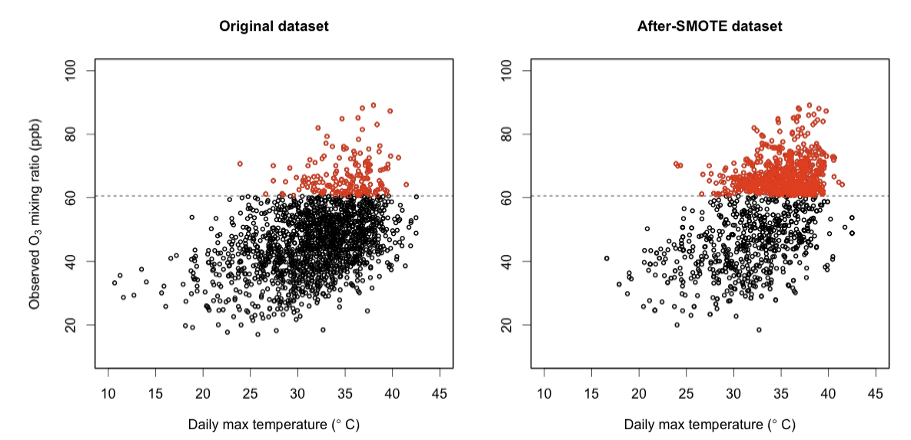

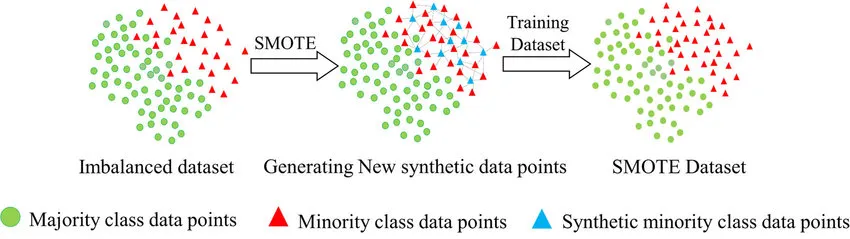

Ref.: "https://medium.com/@evertongomede/synthetic-minority-over-sampling-technique-smote-empowering-ai-through-imbalanced-data-handling-d86f4de32ea3"

## ✅ **Remove Outliers**

The `remove_outliers` function in PyCaret allows you to identify and remove outliers from the dataset before training the model. Outliers are identified through PCA linear dimensionality reduction using the Singular Value Decomposition technique. It can be achieved using `remove_outliers` parameter within **setup**. The proportion of outliers are controlled through `outliers_threshold` parameter.

### **PARAMETERS**
* **remove_outliers: bool, default = False**<br/>
When set to True, outliers from the training data are removed using an Isolation Forest.
* **outliers_method: str, default = 'iforest'**<br/>
Method with which to remove outliers. Ignored when remove_outliers=False. Possible values are:
 * **'iforest':** Uses sklearn's IsolationForest.
 * **'ee'**: Uses sklearn's EllipticEnvelope.
 * **'lof'**: Uses sklearn's LocalOutlierFactor.
* **outliers_threshold: float, default = 0.05**<br/>
The percentage of outliers to be removed from the dataset. Ignored when remove_outliers=False.

### Example 1

In [60]:
# load dataset
from pycaret.datasets import get_data
insurance = get_data('insurance')

# init setup
from pycaret.regression import *
reg1 = setup(data = insurance, target = 'charges', remove_outliers = True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,2351
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1291, 10)"
5,Transformed train set shape,"(889, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [61]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
get_config('X').sort_index()

,age,sex,bmi,children,smoker,region
0,19,female,27.900000,0,yes,southwest
1,18,male,33.770000,1,no,southeast
2,28,male,33.000000,3,no,southeast
3,33,male,22.705000,0,no,northwest
4,32,male,28.879999,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.969999,3,no,northwest
1334,18,female,31.920000,0,no,northeast
1335,18,female,36.849998,0,no,southeast
1336,21,female,25.799999,0,no,southwest


In [63]:
get_config('X_transformed').sort_index()

,age,sex,bmi,children,smoker,region_northeast,region_southeast,region_northwest,region_southwest
0,19.0,0.0,27.900000,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,1.0,33.770000,1.0,0.0,0.0,1.0,0.0,0.0
2,28.0,1.0,33.000000,3.0,0.0,0.0,1.0,0.0,0.0
3,33.0,1.0,22.705000,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,1.0,28.879999,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50.0,1.0,30.969999,3.0,0.0,0.0,0.0,1.0,0.0
1334,18.0,0.0,31.920000,0.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,0.0,36.849998,0.0,0.0,0.0,1.0,0.0,0.0
1336,21.0,0.0,25.799999,0.0,0.0,0.0,0.0,0.0,1.0


**Before and After removing outliers**

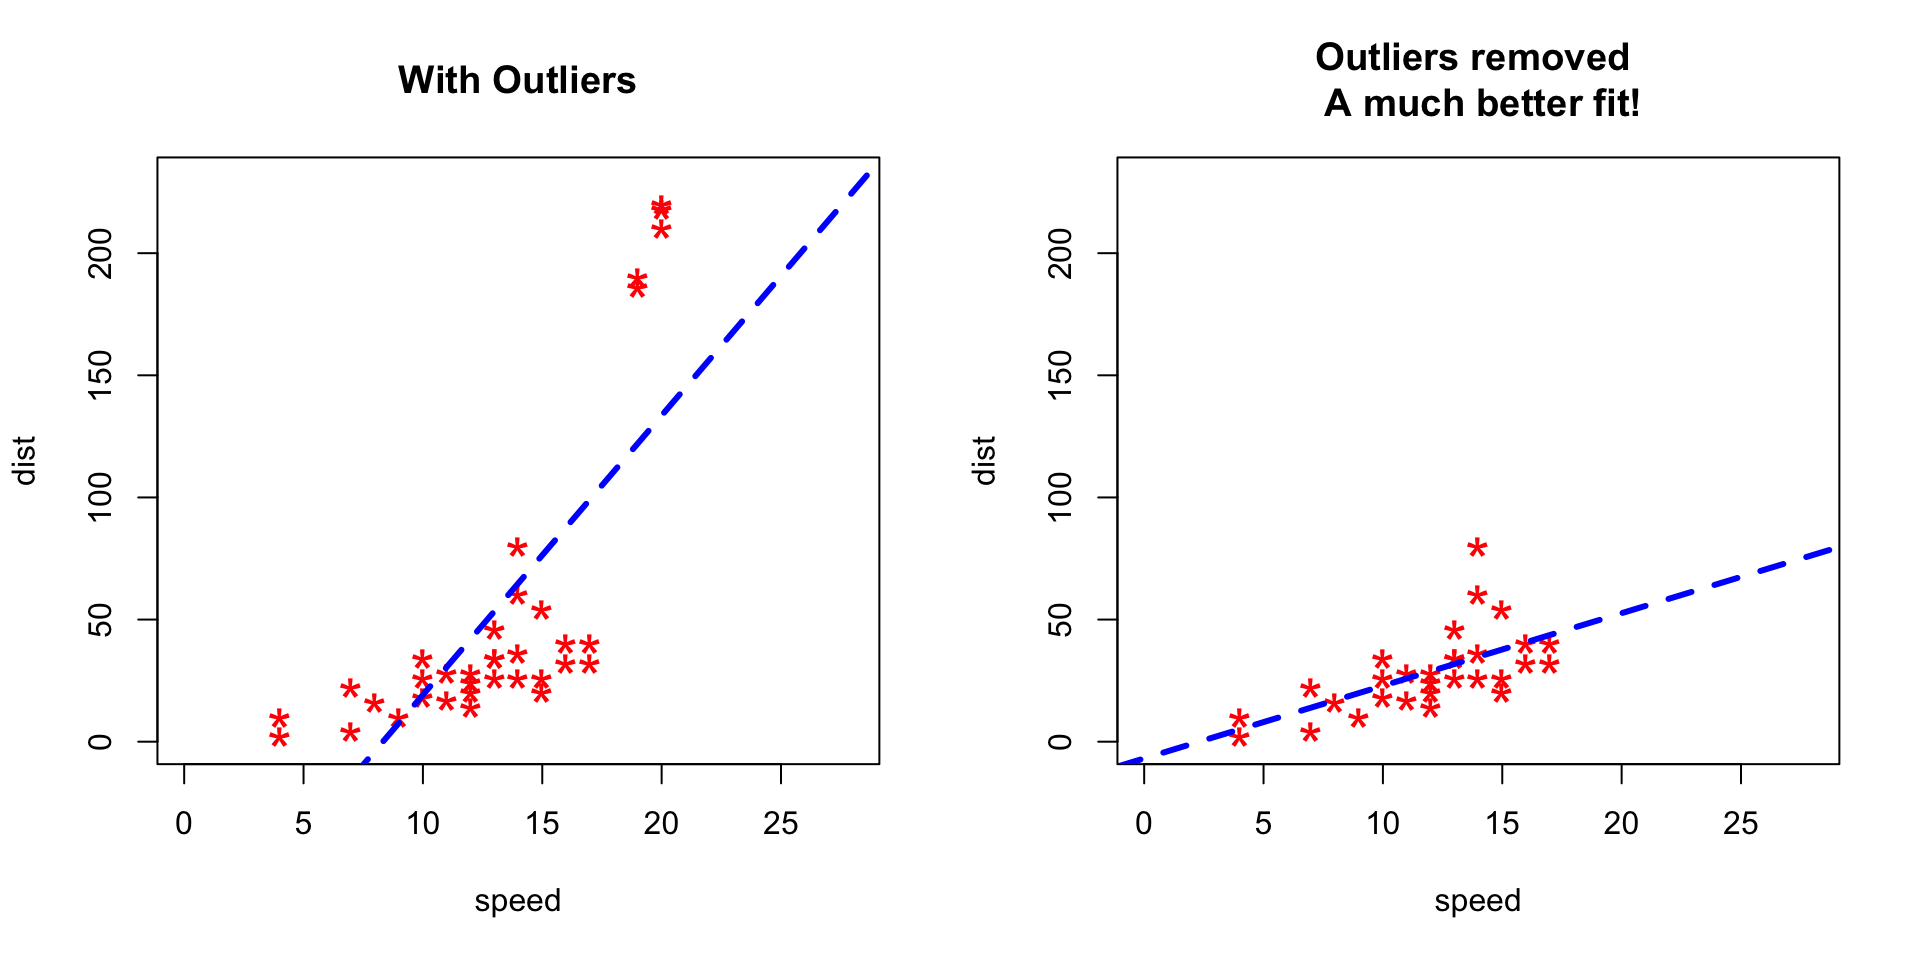

